In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"D:\Codebase\Python\Data Cleaning\Data Clening Concepts\loan_data.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,NaN,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,NaN,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [3]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,380.000000,380.000000,370.000000,351.000000
mean,3579.845144,1280.636632,104.926316,340.864865,0.837607
std,1419.813818,2342.983385,28.371171,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,984.399994,110.000000,360.000000,1.000000
75%,4288.000000,2020.250000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [17]:
# Removing Outlier from ApplicantIncome

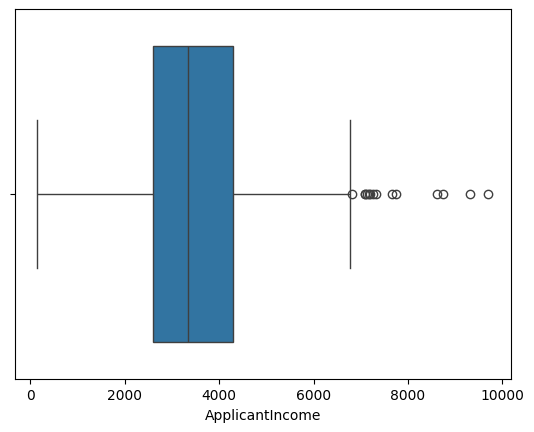

In [5]:
sns.boxplot(x="ApplicantIncome", data=dataset)
plt.show()

In [6]:
dataset.shape

(381, 13)

In [9]:
q1 = dataset['ApplicantIncome'].quantile(0.25)
q3 = dataset['ApplicantIncome'].quantile(0.75)
print(q1,q3)

2600.0 4288.0


In [10]:
IQR = q3 - q1

In [11]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
print(min_range,max_range)

68.0 6820.0


In [15]:
new_dataset = dataset[(dataset['ApplicantIncome']<=max_range) & (dataset['ApplicantIncome']>=min_range)]
new_dataset.shape

(367, 13)

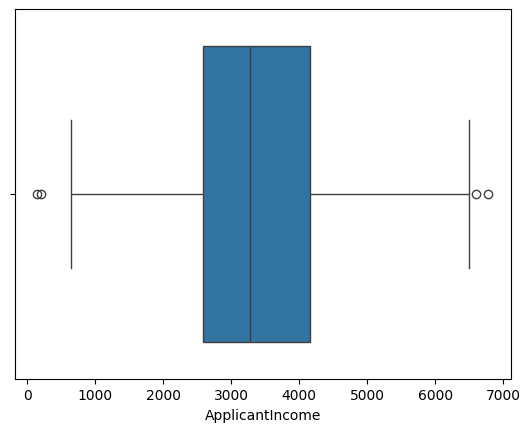

In [16]:
sns.boxplot(x="ApplicantIncome", data=new_dataset)
plt.show()

In [18]:
# Removing Outlier from CoapplicantIncome

In [19]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,380.000000,380.000000,370.000000,351.000000
mean,3579.845144,1280.636632,104.926316,340.864865,0.837607
std,1419.813818,2342.983385,28.371171,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,984.399994,110.000000,360.000000,1.000000
75%,4288.000000,2020.250000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [20]:
dataset.isnull().sum()

Loan_ID               0
Gender               20
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     1
LoanAmount            1
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
# First Filling Nan Place
dataset['CoapplicantIncome'].fillna(dataset['CoapplicantIncome'].mean(), inplace=True)

C:\Users\vadik\AppData\Local\Temp\ipykernel_5328\2571549528.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['CoapplicantIncome'].fillna(dataset['CoapplicantIncome'].mean(), inplace=True)


In [26]:
dataset.isnull().sum()

Loan_ID               0
Gender               20
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            1
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

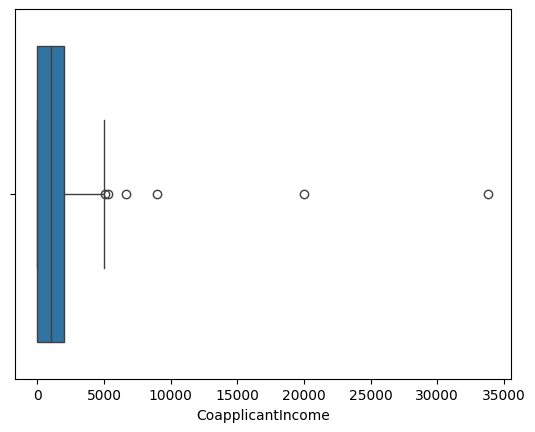

In [22]:
sns.boxplot(x="CoapplicantIncome", data=dataset)
plt.show()

In [28]:
q11 = dataset['CoapplicantIncome'].quantile(0.25)
q33 = dataset['CoapplicantIncome'].quantile(0.75)
q11, q33


(0.0, 2016.0)

In [31]:
IQR = q3 - q1
IQR

1688.0

In [32]:
min_range_1 = q11 - (1.5*IQR)
max_range_1 = q33 + (1.5*IQR)
min_range_1, max_range_1

(-2532.0, 4548.0)

In [33]:
# I Updated my new_dataset by First Removing ApplicantIncome Outlier and Now by Removing Coapplicant Outlier 
new_dataset = dataset[(dataset['CoapplicantIncome']>=(-2532)) & (dataset['CoapplicantIncome']<=4548)]

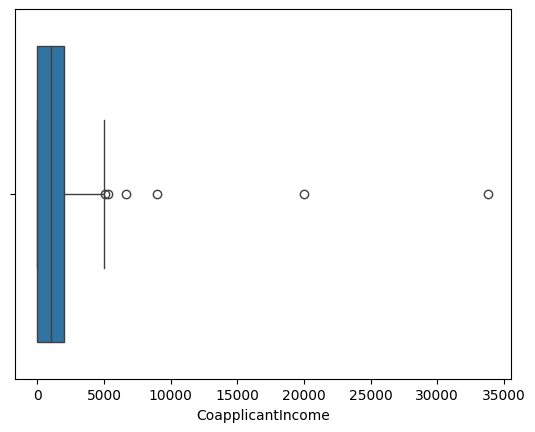

In [34]:
sns.boxplot(x="CoapplicantIncome", data=dataset)
plt.show()

In [35]:
new_dataset.shape

(373, 13)